In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("../data/Sample - Superstore.csv")
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [46]:
print(df.columns)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.isnull().sum()
df = df.drop(columns=['postal_code'], errors='ignore')

df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

df.duplicated().sum()
df = df.drop_duplicates()

print(df['segment'].unique())
print(df['region'].unique())
print(df['category'].unique())
print(df['sub-category'].unique())

df = df.sort_values(by='order_date')

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [13]:
df.describe(include='object')
df.describe(include='number')
df.select_dtypes(include='object').nunique()

order_id         5009
ship_mode           4
customer_id       793
customer_name     793
segment             3
country             1
city              531
state              49
region              4
product_id       1862
category            3
sub-category       17
product_name     1850
dtype: int64

In [14]:
# Total Penjualan dan Profit
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()

print(f"Total Penjualan: ${total_sales:,.2f}")
print(f"Total Profit   : ${total_profit:,.2f}")

Total Penjualan: $2,297,200.86
Total Profit   : $286,397.02


In [14]:
# Penjualan & Profit per Kategori
category_summary = df.groupby('category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)
category_summary

,sales,profit
category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


In [16]:
# Penjualan & Profit per Region
region_summary = df.groupby('region')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)
region_summary

,sales,profit
region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


In [18]:
# Penjualan & Profit Bulanan
monthly = df.resample('ME', on='order_date')[['sales', 'profit']].sum()
monthly.index = monthly.index.strftime('%Y-%m')
monthly.tail()

,sales,profit
order_date,,
2017-08,63120.8880,9040.9557
2017-09,87866.6520,10991.5556
2017-10,77776.9232,9275.2755
2017-11,118447.8250,9690.1037
2017-12,83829.3188,8483.3468


In [19]:
# Rata-rata Profit Margin per-Kategori
df['profit_margin'] = df['profit'] / df['sales']
margin_summary = df.groupby('category')['profit_margin'].mean().sort_values(ascending=False)
margin_summary

category
Technology         0.156138
Office Supplies    0.138030
Furniture          0.038784
Name: profit_margin, dtype: float64

In [15]:
# Sub Kategori Paling Rugi
sub_profit = df.groupby('sub-category')['profit'].sum().sort_values()
sub_profit.head()

sub-category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: profit, dtype: float64

In [16]:
# Diskon Tinggi tetapi Rugi
high_discount_loss = df[(df['discount'] > 0.2) & (df['profit'] < 0)]
high_discount_loss[['product_name', 'discount', 'profit']].head()

,product_name,discount,profit
741,GBC Standard Plastic Binding Systems Combs,0.8,-5.4870
7660,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",0.6,-53.7096
7661,Acco Four Pocket Poly Ring Binder with Label H...,0.8,-18.2525
9629,Avery Metallic Poly Binders,0.7,-2.5212
6474,Sauder Cornerstone Collection Library,0.5,-53.2856


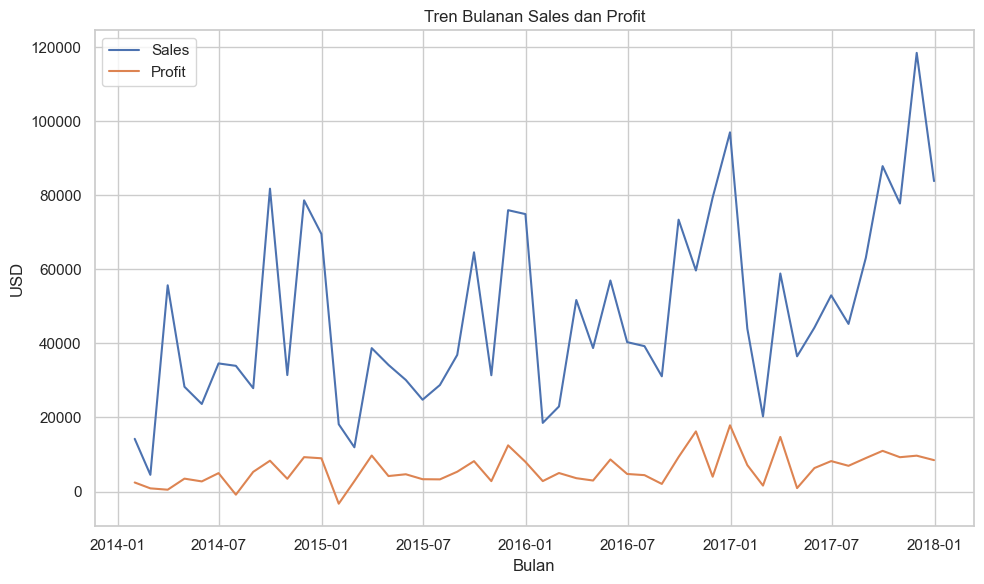

In [47]:
# Chart Penjualan dan Profit Bulanan
monthly = df.resample('ME', on='order_date')[['sales', 'profit']].sum()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly, x=monthly.index, y='sales', label='Sales')
sns.lineplot(data=monthly, x=monthly.index, y='profit', label='Profit')
plt.title('Tren Bulanan Sales dan Profit')
plt.xlabel('Bulan')
plt.ylabel('USD')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()

plt.savefig('../images/tren_bulanan_sales_dan_profit.png')
plt.show()

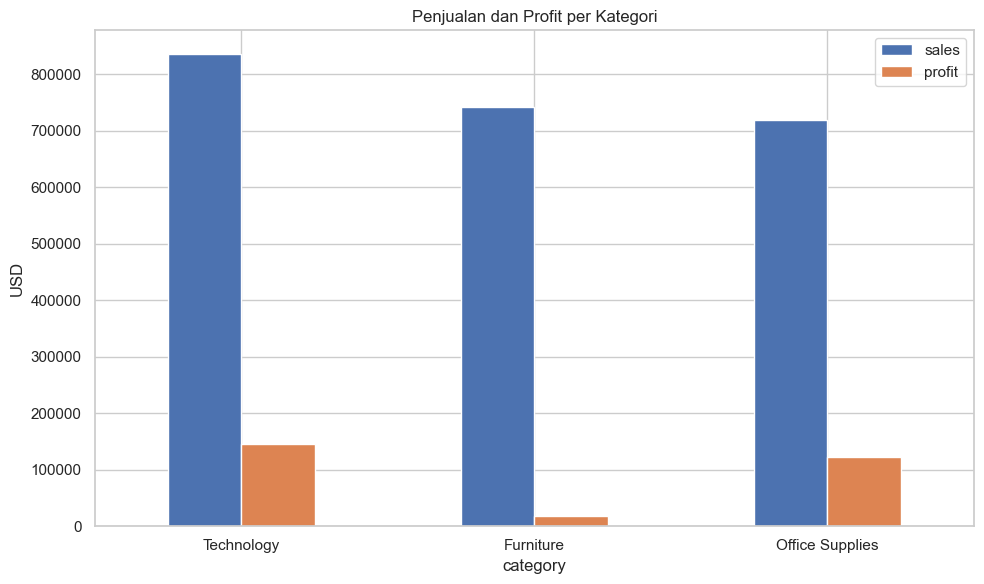

In [48]:
# Chart Penjualan Per Kategori
category_summary = df.groupby('category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)

category_summary.plot(kind='bar', figsize=(10,6))
plt.title('Penjualan dan Profit per Kategori')
plt.ylabel('USD')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('../images/penjualan&profit_perKategori.png')
plt.show()

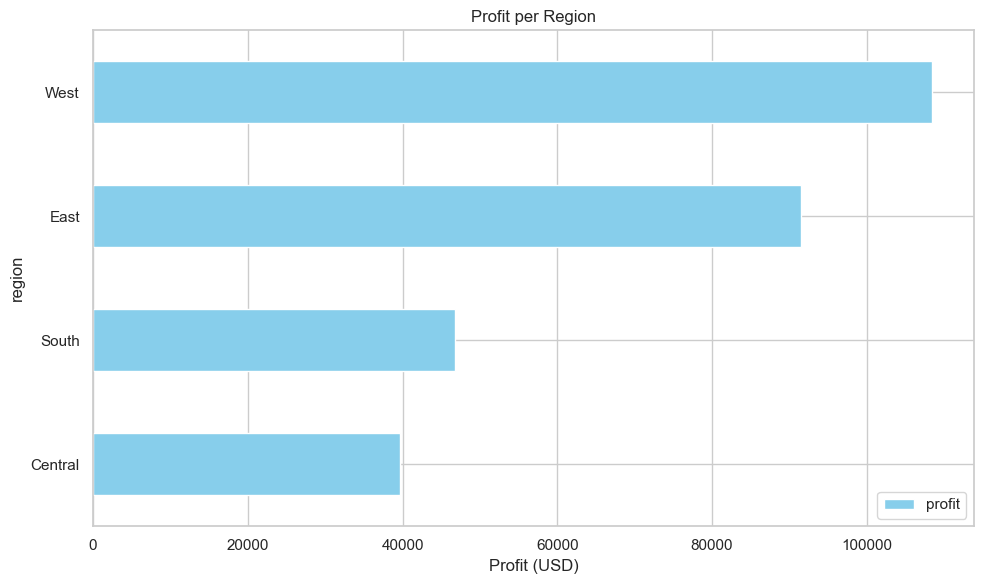

In [53]:
# Chart Profil per Region
region_summary = df.groupby('region')[['profit']].sum().sort_values(by='profit')

region_summary.plot(kind='barh', color='skyblue', figsize=(10,6))
plt.title('Profit per Region')
plt.xlabel('Profit (USD)')
plt.tight_layout()

plt.savefig('../images/penjualan&profit_perRegion.png')
plt.show()

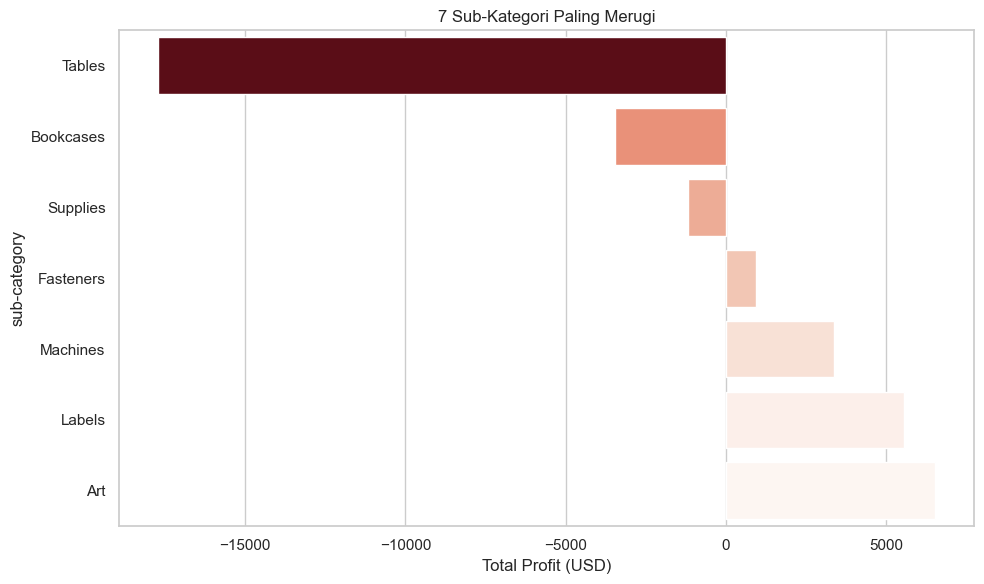

In [54]:
# Chart Sub-Kategori Paling Rugi
sub_loss = df.groupby('sub-category')['profit'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=sub_loss.values[:7], y=sub_loss.index[:7], hue=sub_loss.values[:7], palette='Reds_r', legend=False)
plt.title('7 Sub-Kategori Paling Merugi')
plt.xlabel('Total Profit (USD)')
plt.tight_layout()

plt.savefig('../images/top7_subkategori_rugi.png')
plt.show()

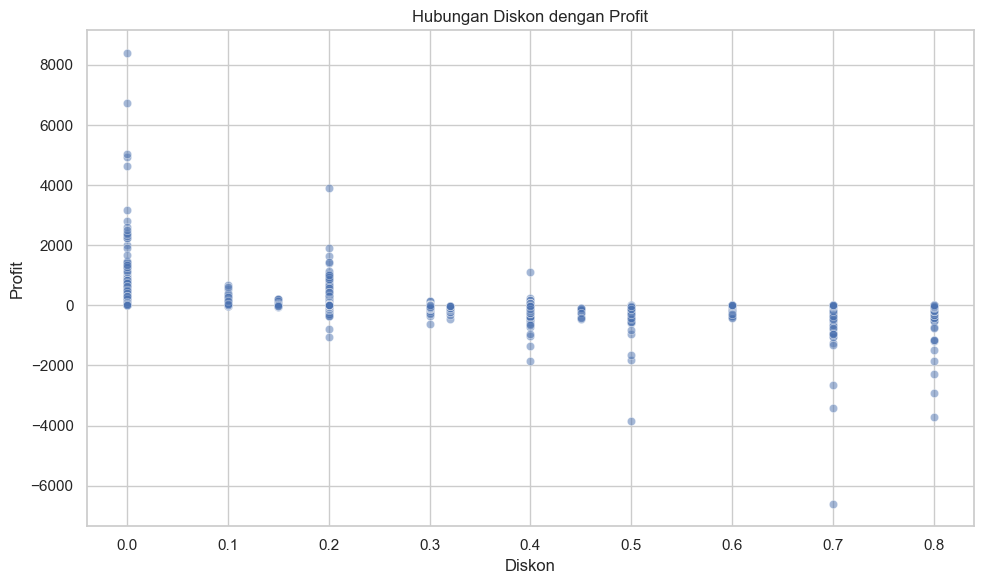

In [55]:
# Chart Diskon vs Profit
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.5)
plt.title('Hubungan Diskon dengan Profit')
plt.xlabel('Diskon')
plt.ylabel('Profit')
plt.tight_layout()

plt.savefig('../images/hubungan_DiskonProfit.png')
plt.show()

In [56]:
# Simpan DataFrame yang sudah dicleaning & diproses
df.to_csv('../data/superstore_clean.csv', index=False)